## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


## Extracting x and y

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Feature Scalling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

## splitting x and y into training set and test set

In [5]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te  = train_test_split(x,y,train_size = 0.8,random_state = 0)

In [6]:
# creating and training the knn model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## predicting the output

In [7]:
y_pred = classifier.predict(x_te)

## plotting the confusion matrix and the accuracy score

[[55  3]
 [ 1 21]]
0.95


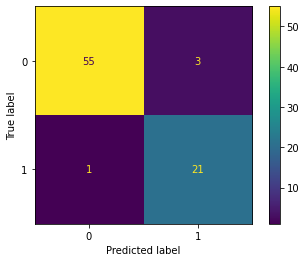

In [10]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
plot_confusion_matrix(estimator=classifier,X=x_te,y_true=y_te)
print(confusion_matrix(y_te,y_pred))
print(accuracy_score(y_te,y_pred))

## visualizing the output

c:\users\gurvansh singh\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


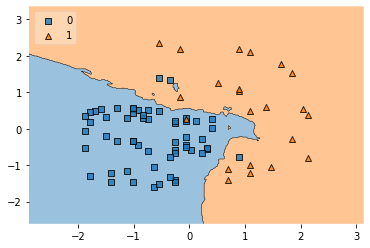

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(clf=classifier, X=x_te, y=y_te, legend=2)
plt.show()